In [1]:
from PIL import Image
import numpy as np

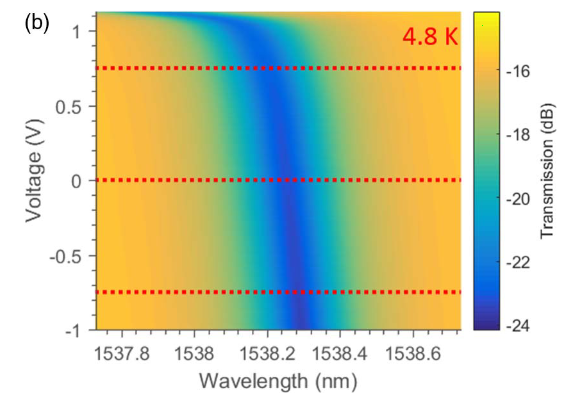

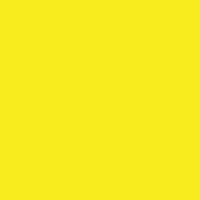

In [2]:
#Here we have the image I am analyzing as well as all the coordinates of the different elements of it.

img = Image.open("Gehl-4K.png")
img = img.convert("RGB")
p = (482,  25)

#image is 580 x 397 pixels
#graph is 98-460 x 15-329
#scale is 475-498 x 13-328

d = img.getpixel(p)

img.putpixel(p, (29, 252, 0))
display(img)
check = Image.new('RGB',(200,200),d)
display(check)

In [3]:
x_scale = np.linspace(475,498, 24, dtype=int)
y_scale = np.linspace(328,13, 316, dtype=int)
print(y_scale)

[328 327 326 325 324 323 322 321 320 319 318 317 316 315 314 313 312 311
 310 309 308 307 306 305 304 303 302 301 300 299 298 297 296 295 294 293
 292 291 290 289 288 287 286 285 284 283 282 281 280 279 278 277 276 275
 274 273 272 271 270 269 268 267 266 265 264 263 262 261 260 259 258 257
 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239
 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221
 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203
 202 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185
 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167
 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149
 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131
 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113
 112 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95
  94  93  92  91  90  89  88  87  86  85  84  83  8

In [4]:
#next we get the rgb code for each pixel in the scale

color = []
for y in y_scale:
    line = []
    for x in x_scale:
        d = list(img.getpixel((x,y)))
        line.append(d)
    color.append(line)

In [6]:
#test print all these lines

print(color[0])
print(color[0][0])
print(color[0][0][0])
print(len(color))

[[53, 40, 124], [57, 44, 128], [56, 43, 127], [54, 41, 126], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [56, 43, 128], [59, 45, 129], [57, 44, 122], [61, 50, 117], [45, 36, 92]]
[53, 40, 124]
53
316


In [7]:
#then we remove any duplicate rgb codes in the scale to save time

res = []
scale = []
[res.append(x) for x in color[315] if x not in res]

for line in range(0,len(color)):
    res = []
    [res.append(x) for x in color[line] if x not in res]
    scale.append(res)

(16, 173, 188)


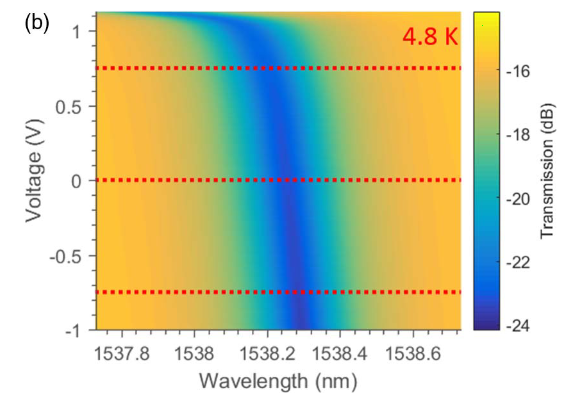

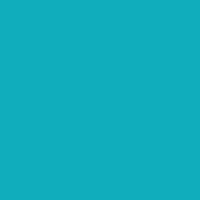

In [8]:
#Here we look at the image again

d = img.getpixel((250,190))

print(d)
display(img)

check = Image.new('RGB',(200,200),d)
display(check)

In [9]:
v = 2.1/(329-15)

print(v)

0.006687898089171975


In [11]:
#create a list of voltages starting at 1.1V and moving up
s = 1.1
voltages = []
for n in range(329-15):
    voltages.append(s)
    s = s - v

print(len(voltages))
voltages.reverse()
print(voltages[-1]) 

314
1.1


In [12]:
print(len(scale))
print(len(scale[0]))

316
9


In [23]:
x_axis = np.linspace(99,459, 362, dtype=int)
y_axis = np.linspace(328,15, 314, dtype=int)
print(x_axis)

[ 99  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 34

In [14]:
#here we look over the whole range of the graph and try and match each pixel to a color on the scale
#this one takes a bit
#this is also just for the picture, not actually recording data



test = Image.open("Gehl-4K-Copy.png")
test =  test.convert("RGB")
match = 0

for yrange in y_axis:
    for xrange in x_axis:
        pixel = list(img.getpixel((xrange,yrange)))
        for x in range(0,len(scale)):
            for l in range(0,len(scale[x])):
                compare = scale[x][l]
                #test.putpixel((xrange,yrange), (0, 0, 0))
                if pixel == compare:
                    match = match + 1
                    test.putpixel((xrange,yrange), (29, 252, 0))
                    

In [15]:
#this is how many matches we get

print(match)

32072


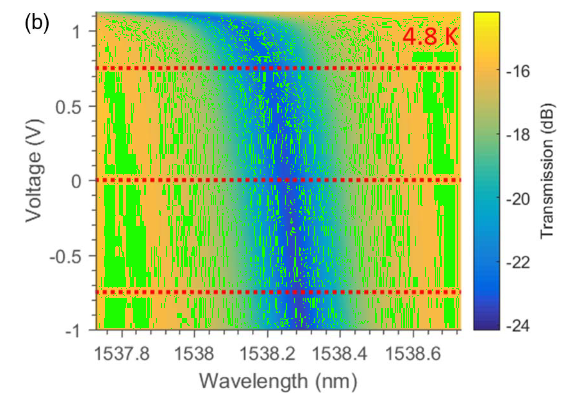

In [16]:
#this is a visual display of the data that is a match

display(test)

In [17]:
test.save("Visual-4K.png")

In [18]:
print(len(scale))
print(len(scale[x]))

316
14


In [19]:
#now we look at each pixel again and if it is a match we add it to a list in an array of all the lines
#this one also takes a while but is necessary

values = []

for yrange in y_axis:
    line = []
    for xrange in x_axis:
        pixel = list(img.getpixel((xrange,yrange)))
        for trans in range(0,len(scale)):          #trans is the y value on the scale that ths pixel matches with
            for l in range(0,len(scale[trans])):
                compare = scale[trans][l]
                if pixel == compare:
                    line.append((xrange, trans))  #xrange is the x value of the pixel on the graph that is a match
    values.append(line)
                    

In [20]:
#now we have an array of x and y values for each horizontal line. 
#the index of each line coresponds with the index of the voltage value in the voltages array

print(voltages[100])
print((values[100]))
print(len(values))

-0.32452229299363516
[(104, 271), (105, 271), (106, 271), (107, 271), (108, 271), (109, 271), (110, 271), (111, 271), (112, 271), (113, 271), (114, 271), (118, 271), (119, 270), (126, 265), (127, 265), (128, 265), (129, 265), (130, 265), (131, 265), (132, 265), (133, 265), (134, 265), (135, 265), (136, 265), (137, 265), (138, 265), (139, 265), (140, 265), (141, 265), (142, 265), (143, 265), (144, 265), (145, 265), (170, 252), (171, 252), (172, 252), (176, 249), (178, 249), (181, 244), (181, 245), (182, 243), (183, 243), (184, 244), (184, 245), (188, 238), (189, 238), (195, 237), (196, 237), (198, 234), (200, 233), (203, 230), (205, 226), (208, 225), (209, 224), (219, 210), (222, 203), (228, 193), (231, 188), (236, 177), (254, 135), (260, 114), (260, 115), (269, 82), (274, 62), (276, 56), (292, 25), (293, 25), (294, 25), (299, 33), (300, 34), (300, 37), (304, 44), (308, 58), (308, 61), (314, 81), (321, 106), (323, 114), (323, 115), (325, 124), (325, 125), (326, 127), (328, 135), (331, 1

In [21]:
#now we can turn the lines into x and y arrays to graph

for l in values:
    print(l)

npvalues = np.array(values[100])
wave = npvalues[:,0]
transmission = npvalues[:,1]


[(133, 251), (140, 251), (171, 245), (288, 55)]
[(99, 273), (99, 273), (104, 270), (105, 271), (106, 271), (107, 271), (108, 271), (109, 271), (110, 271), (111, 271), (112, 271), (113, 271), (114, 271), (115, 271), (116, 271), (117, 271), (118, 271), (119, 271), (120, 271), (121, 271), (122, 271), (123, 271), (124, 271), (130, 269), (131, 267), (131, 268), (135, 263), (135, 264), (136, 265), (137, 265), (138, 265), (139, 265), (140, 265), (141, 265), (142, 265), (143, 265), (144, 265), (145, 265), (146, 265), (147, 265), (148, 266), (153, 265), (180, 248), (181, 248), (194, 244), (194, 245), (195, 244), (195, 245), (196, 243), (198, 241), (199, 238), (205, 237), (206, 237), (207, 234), (207, 235), (235, 198), (236, 197), (237, 196), (241, 189), (248, 176), (253, 166), (254, 162), (255, 158), (256, 155), (258, 152), (271, 111), (271, 112), (277, 83), (277, 84), (278, 83), (278, 84), (307, 27), (317, 56), (323, 73), (323, 74), (323, 75), (323, 76), (331, 109), (331, 110), (331, 111), (33

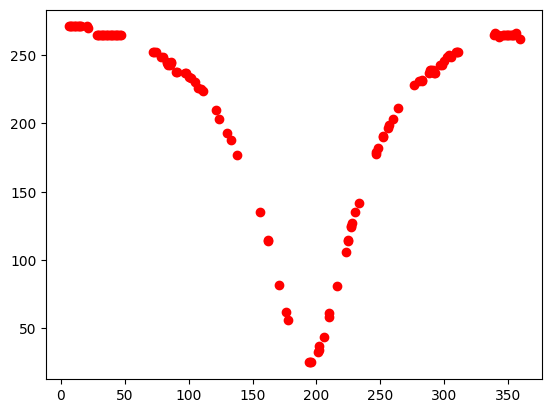

In [22]:
#we want to graph the trans mission number on the y axis and the wavelength on the x axis

import matplotlib.pyplot as plt

plt.plot(wave-98, transmission, 'ro', label='data')
plt.show()

In [45]:
#we know the general shape is right so we just need to convert the values to the right ones
total = 1538.72-1537.72
print(total)

1.0


In [46]:
pixvalue = 1/(460-99)
print(pixvalue)


0.002770083102493075


In [47]:
start = 1537.72
wl = []
for n in range(460-99):
    wl.append(start)
    start = start + pixvalue

In [48]:
print(wl)

[1537.72, 1537.7227700831024, 1537.7255401662048, 1537.7283102493072, 1537.7310803324096, 1537.733850415512, 1537.7366204986145, 1537.7393905817169, 1537.7421606648193, 1537.7449307479217, 1537.747700831024, 1537.7504709141265, 1537.7532409972289, 1537.7560110803313, 1537.7587811634337, 1537.761551246536, 1537.7643213296385, 1537.767091412741, 1537.7698614958433, 1537.7726315789457, 1537.7754016620481, 1537.7781717451505, 1537.780941828253, 1537.7837119113553, 1537.7864819944577, 1537.7892520775601, 1537.7920221606626, 1537.794792243765, 1537.7975623268674, 1537.8003324099698, 1537.8031024930722, 1537.8058725761746, 1537.808642659277, 1537.8114127423794, 1537.8141828254818, 1537.8169529085842, 1537.8197229916866, 1537.822493074789, 1537.8252631578914, 1537.8280332409938, 1537.8308033240962, 1537.8335734071986, 1537.836343490301, 1537.8391135734034, 1537.8418836565058, 1537.8446537396082, 1537.8474238227107, 1537.850193905813, 1537.8529639889155, 1537.8557340720179, 1537.8585041551203, 

In [49]:
total2 = 24-14
print(total2)

10


In [50]:
pixvalue = 10/(315)
print(pixvalue)

0.031746031746031744


In [51]:
start = -24
sc = []
for n in range(316):
    sc.append(start)
    start = start + pixvalue

In [52]:
print(len(sc))

316


In [53]:
#now we just need to transform all the pixel coordinates into the correct values
new_trans_values = []
for x in range(len(transmission)):
    new_trans_values.append(sc[transmission[x]])

In [54]:
print(transmission)
print(new_trans_values)

[271 271 271 271 271 271 271 271 271 271 271 271 270 265 265 265 265 265
 265 265 265 265 265 265 265 265 265 265 265 265 265 265 265 252 252 252
 249 249 244 245 243 243 244 245 238 238 237 237 234 233 230 226 225 224
 210 203 193 188 177 135 114 115  82  62  56  25  25  25  33  34  37  44
  58  61  81 106 114 115 124 125 127 135 142 178 179 182 190 191 197 199
 203 211 228 231 231 232 237 239 239 239 237 237 243 243 246 249 250 249
 252 252 252 265 266 265 263 264 265 265 265 265 265 265 265 265 265 265
 266 262]
[-15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.396825396825427, -15.428571428571459, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301617, -15.587301587301

In [55]:
new_wave_values = []
for x in range(len(wave)):
    #print(wave[x]-98)
    new_wave_values.append(wl[wave[x]-98])

In [56]:
print(new_wave_values)

[1537.7366204986145, 1537.7393905817169, 1537.7421606648193, 1537.7449307479217, 1537.747700831024, 1537.7504709141265, 1537.7532409972289, 1537.7560110803313, 1537.7587811634337, 1537.761551246536, 1537.7643213296385, 1537.7754016620481, 1537.7781717451505, 1537.7975623268674, 1537.8003324099698, 1537.8031024930722, 1537.8058725761746, 1537.808642659277, 1537.8114127423794, 1537.8141828254818, 1537.8169529085842, 1537.8197229916866, 1537.822493074789, 1537.8252631578914, 1537.8280332409938, 1537.8308033240962, 1537.8335734071986, 1537.836343490301, 1537.8391135734034, 1537.8418836565058, 1537.8446537396082, 1537.8474238227107, 1537.850193905813, 1537.9194459833732, 1537.9222160664756, 1537.924986149578, 1537.9360664819876, 1537.9416066481924, 1537.9499168974996, 1537.9499168974996, 1537.952686980602, 1537.9554570637044, 1537.9582271468068, 1537.9582271468068, 1537.9693074792165, 1537.9720775623189, 1537.9886980609333, 1537.9914681440357, 1537.9970083102405, 1538.0025484764453, 1538.01

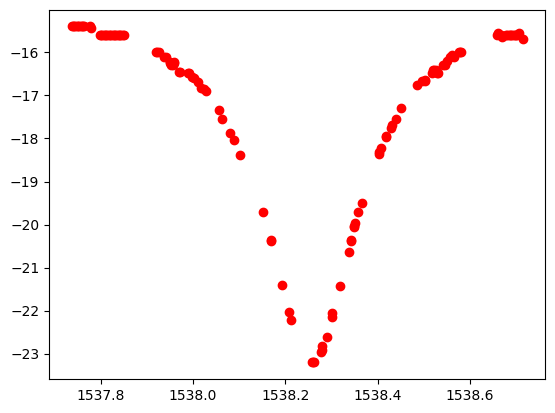

In [57]:
#test the plot now

plt.plot(new_wave_values, new_trans_values, 'ro', label='data')
plt.show()

In [58]:
#yay! now i just need to make a code that does this 315 more times
#fuck

#ok first lets make a function that turns the pixel values into the right numbers

new_values = []
def transformer(array):
    for n in range(0,len(array)):
        new_wave_values = []
        new_trans_values = []
        line = []
        npvalues = np.array(values[n]) #turning each line into an np array (easier to work with)
        wave = npvalues[:,0]           #changes all the x values in that line into one array
        transmission = npvalues[:,1]   #changes all the y values in that line into one array
        for x in range(len(wave)):
            new_wave_values.append(wl[wave[x]-99])
        line.append(new_wave_values)
        for y in range(len(transmission)):
            new_trans_values.append(sc[transmission[y]])
        line.append(new_trans_values)
        new_values.append(line)
        


In [59]:
transformer(values)

In [60]:
print(new_values)
print(len(new_values))
print(len(new_values[0]))
print(len(new_values[0][0]))

[[[1537.8141828254818, 1537.8335734071986, 1537.9194459833732, 1538.2435457063546], [-16.03174603174606, -16.03174603174606, -16.22222222222225, -22.25396825396826]], [[1537.72, 1537.72, 1537.733850415512, 1537.7366204986145, 1537.7393905817169, 1537.7421606648193, 1537.7449307479217, 1537.747700831024, 1537.7504709141265, 1537.7532409972289, 1537.7560110803313, 1537.7587811634337, 1537.761551246536, 1537.7643213296385, 1537.767091412741, 1537.7698614958433, 1537.7726315789457, 1537.7754016620481, 1537.7781717451505, 1537.780941828253, 1537.7837119113553, 1537.7864819944577, 1537.7892520775601, 1537.8058725761746, 1537.808642659277, 1537.808642659277, 1537.8197229916866, 1537.8197229916866, 1537.822493074789, 1537.8252631578914, 1537.8280332409938, 1537.8308033240962, 1537.8335734071986, 1537.836343490301, 1537.8391135734034, 1537.8418836565058, 1537.8446537396082, 1537.8474238227107, 1537.850193905813, 1537.8529639889155, 1537.8557340720179, 1537.86958448753, 1537.9443767312948, 1537.

In [61]:
file = open('items-4K.txt','w')
for item in new_values:
	file.write(str(item)+"\n")
file.close()

In [62]:
np.savetxt("voltages-4K.csv", voltages, delimiter = ",")

In [63]:
print(len(new_values))
print(len(new_values[0][0]))

314
4


In [64]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences